In [35]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [36]:

df = pd.read_csv('owid-covid-data.csv')  # Adjust the path as necessary

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['location_encoded'] = label_encoder.fit_transform(df['location'])

selected_features = ['date','total_cases', 'handwashing_facilities' , 'weekly_icu_admissions','new_cases',
                     'life_expectancy', 'population', 'gdp_per_capita', 'hospital_beds_per_thousand',
                     'human_development_index', 'excess_mortality', 'location_encoded', 'people_vaccinated',
                     'total_vaccinations', 'extreme_poverty', 'positive_rate', 'new_deaths']

df = df[selected_features]

non_zero_mean = df[df['new_deaths'] != 0]['new_deaths'].mean()
df['new_deaths'] = df['new_deaths'].replace(0, non_zero_mean)


df.fillna(df.mean(), inplace=True)

df.rename(columns={'date': 'ds', 'new_deaths': 'y'}, inplace=True)

train, test = train_test_split(df, test_size=0.2, random_state=42)



<ipython-input-36-09b0a0b2ac53>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_deaths'] = df['new_deaths'].replace(0, non_zero_mean)
<ipython-input-36-09b0a0b2ac53>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
<ipython-input-36-09b0a0b2ac53>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'new_d

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/1fsn3ps1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/hhytgrco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56845', 'data', 'file=/tmp/tmpoc5q2wxv/1fsn3ps1.json', 'init=/tmp/tmpoc5q2wxv/hhytgrco.json', 'output', 'file=/tmp/tmpoc5q2wxv/prophet_model0_linpea/prophet_model-20240421154538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2022-02-20 00:00:00 and 2023-02-15 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/b06pqvlv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/0l4997a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13323', 'data', 'file=/tmp/tmpoc5q2wxv/b06pqvlv.json', 'init=/tmp/tmpoc5q2wxv/0l4997a5.json', 'output', 'file=/tmp/tmpoc5q2wxv/prophet_model_w4hm_30/prophet_model-20240421154617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/z5evu04f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc5q2wxv/40q_xquh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon            mse        rmse         mae       mape     mdape  \
0 36 days  317399.508340  563.382204  125.922329  12.894030  0.056351   
1 37 days  321366.094224  566.891607  130.447650  13.398628  0.057446   
2 38 days  318061.805621  563.969685  129.244508  12.659951  0.059274   
3 39 days  320790.153450  566.383398  133.487361  13.049819  0.060363   
4 40 days  317521.605554  563.490555  132.876130  12.531246  0.061327   

      smape  coverage  
0  0.188723  0.996503  
1  0.197092  0.996408  
2  0.192318  0.996556  
3  0.200146  0.996522  
4  0.196867  0.996662  
Predicted vs Actual values:
                ds           y        yhat
0       2021-01-07  760.408905  820.934742
1       2021-01-07  760.408905  820.934742
2       2021-01-07  760.408905  820.934742
3       2021-01-07  760.408905  820.934742
4       2021-01-07  760.408905  820.934742
...            ...         ...         ...
2878481 2024-02-09  760.408905  753.953238
2878482 2024-02-09  760.408905  753.953238
28

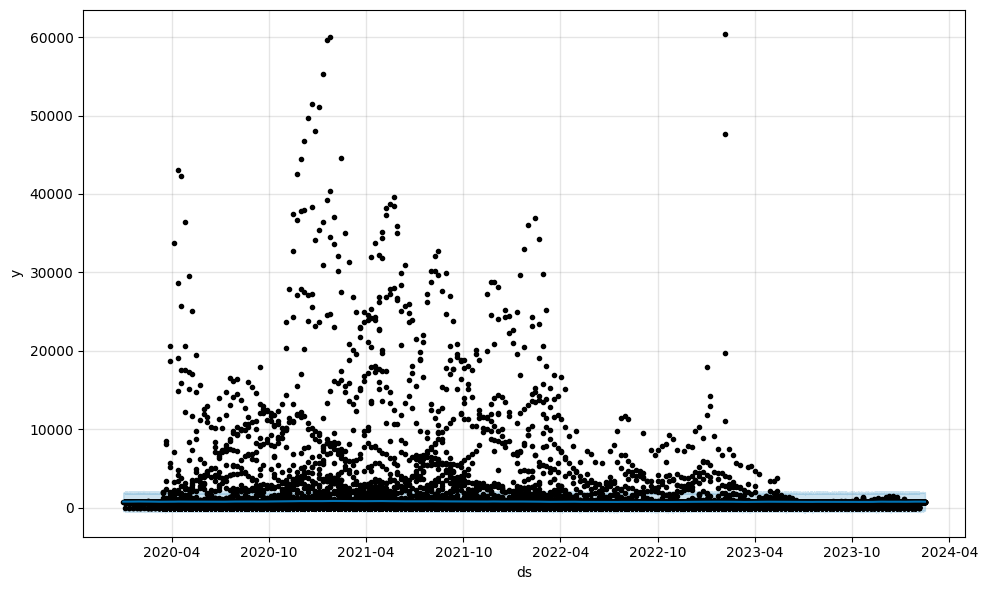

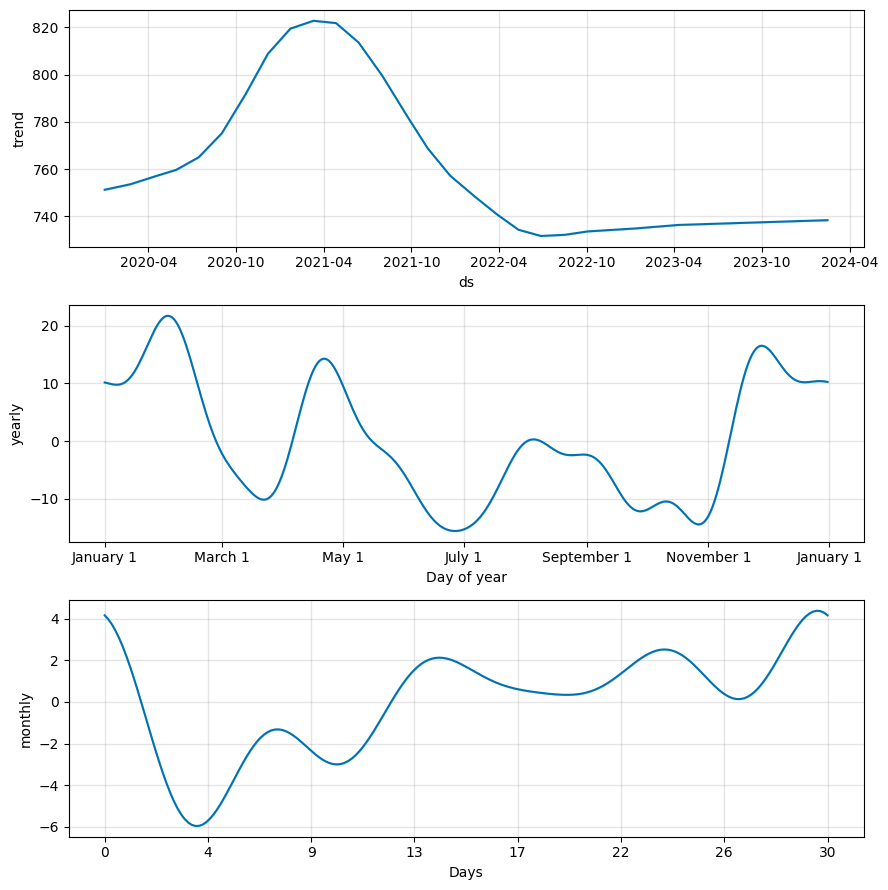

In [37]:
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.fit(train)

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

df_p = performance_metrics(df_cv)
print(df_p.head())

forecast = model.predict(test[['ds']])

test_forecast = test.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

print("Predicted vs Actual values:")
print(test_forecast[['ds', 'y', 'yhat']])

mae = mean_absolute_error(test_forecast['y'], test_forecast['yhat'])
mse = mean_squared_error(test_forecast['y'], test_forecast['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(test_forecast['y'], test_forecast['yhat'])

print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

fig1 = model.plot(forecast)

fig2 = model.plot_components(forecast)

plt.show()